In [1]:
#import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#read csv file & store it in housing_df
housing_df = pd.read_csv("train.csv")

In [3]:
#Display 1st 5 rows 
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_df.shape

(1460, 81)

In [5]:
#display the data from all columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
#Checking how much percentage of the data is missing for each column
round(100*(housing_df.isnull().sum()/len(housing_df.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [7]:
housing_df.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [8]:
#dropping the columns since more than 80% of the data is missing
housing_df = housing_df.drop(['PoolQC','MiscFeature','Fence','Alley'],axis=1)

In [9]:
#updated shape of dataframe
housing_df.shape

(1460, 77)

In [10]:
housing_df.FireplaceQu.isnull().sum()

690

In [11]:
housing_df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [12]:
housing_df.FireplaceQu = housing_df.FireplaceQu.fillna('NA')

In [13]:
housing_df.FireplaceQu.value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [14]:
housing_df.LotFrontage.isnull().sum()

259

In [15]:
#displaying different quartiles
housing_df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

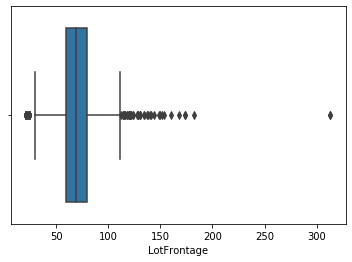

In [16]:
#checking for outliers using boxplot
sns.boxplot(housing_df.LotFrontage)
plt.show()

In [17]:
housing_df.LotFrontage = housing_df.LotFrontage.fillna(housing_df.LotFrontage.median())

In [18]:
round(100*(housing_df.isnull().sum()/len(housing_df.index)),2).sort_values(ascending=False)

GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageCond       5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
RoofMatl         0.00
RoofStyle        0.00
SalePrice        0.00
Exterior1st      0.00
Exterior2nd      0.00
YearBuilt        0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
YearRemodAdd     0.00
BldgType         0.00
OverallCond      0.00
LandContour      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
Utilities        0.00
OverallQual      0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
HouseStyle       0.00
BsmtFinSF1       0.00
Heating          0.00
BsmtFinSF2       0.00
EnclosedPorch    0.00
FireplaceQu      0.00
GarageCars

In [19]:
#checking null values
NA_features = housing_df.isnull().sum()
#find out columns which have nulls
NA_features = NA_features[NA_features > 0]
#columns & percentage of values missing
print(round(100*NA_features[NA_features > 0]/len(housing_df),2).sort_values(ascending=False))

GarageCond      5.55
GarageQual      5.55
GarageFinish    5.55
GarageYrBlt     5.55
GarageType      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64


In [20]:
import datetime as d
current_year = int(d.datetime.now().year)
current_year

2021

In [21]:
housing_df['YearBuilt'] = current_year - housing_df['YearBuilt']
housing_df['YearRemodAdd'] = current_year - housing_df['YearRemodAdd']
housing_df['GarageYrBlt'] = current_year - housing_df['GarageYrBlt']
housing_df['YrSold'] = current_year - housing_df['YrSold']

In [22]:
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna(housing_df['GarageYrBlt'].mean())

In [23]:
housing_df.GarageCond = housing_df.GarageCond.fillna('NA')

In [24]:
housing_df.GarageQual = housing_df.GarageQual.fillna('NA')
housing_df.GarageFinish = housing_df.GarageFinish.fillna('NA')
housing_df.GarageType = housing_df.GarageType.fillna('NA')

In [25]:
# housing_df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [26]:
#checking null values
NA_features = housing_df.isnull().sum()
#find out columns which have nulls
NA_features = NA_features[NA_features > 0]
#columns & percentage of values missing
print(round(100*NA_features[NA_features > 0]/len(housing_df),2).sort_values(ascending=False))

BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64


In [27]:
housing_df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [28]:
housing_df.BsmtFinType2 = housing_df.BsmtFinType2.fillna('NA')
housing_df.BsmtExposure = housing_df.BsmtExposure.fillna('NA')
housing_df.BsmtFinType1 = housing_df.BsmtFinType1.fillna('NA')
housing_df.BsmtCond = housing_df.BsmtCond.fillna('NA')
housing_df.BsmtQual = housing_df.BsmtQual.fillna('NA')

In [29]:
#checking null values
NA_features = housing_df.isnull().sum()
#find out columns which have nulls
NA_features = NA_features[NA_features > 0]
#columns & percentage of values missing
print(round(100*NA_features[NA_features > 0]/len(housing_df),2).sort_values(ascending=False))

MasVnrArea    0.55
MasVnrType    0.55
Electrical    0.07
dtype: float64


In [30]:
housing_df.MasVnrArea.isnull().sum()

8

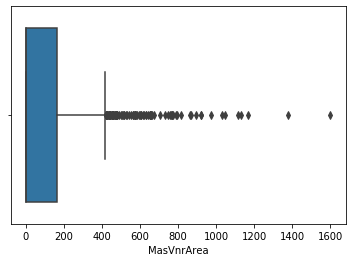

In [31]:
sns.boxplot(housing_df.MasVnrArea)
plt.show()

In [32]:
housing_df.MasVnrArea = housing_df.MasVnrArea.fillna(housing_df.MasVnrArea.median())

In [33]:
housing_df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [34]:
housing_df.MasVnrType = housing_df.MasVnrType.replace(np.nan,'None')

In [35]:

housing_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [36]:
housing_df.Electrical = housing_df.Electrical.replace(np.nan,'SBrkr')

In [37]:
#checking null values
NA_features = housing_df.isnull().sum()
#find out columns which have nulls
NA_features = NA_features[NA_features > 0]
#columns & percentage of values missing
print(round(100*NA_features[NA_features > 0]/len(housing_df),2).sort_values(ascending=False))

Series([], dtype: float64)


In [38]:
housing_df.shape

(1460, 77)